# TP Scoring: 

## Membres: Linsey Nkatouloulou & Guilhem Mobasso

## Librairies

### TO DO:

- Sélections des variabes
- Changer les formats
- Traitement des valeurs extrêmes

In [1]:
import sys
import os

print("Current working directory:", os.getcwd())

# Assurez-vous que le répertoire parent est dans sys.path
sys.path.append(os.path.abspath('..'))
print("Updated sys.path:", sys.path)

import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy.stats import chi2_contingency
from fonctions import split_data


Current working directory: c:\Users\lulil\OneDrive\Documents\SCORING-TIDE\analyse
Updated sys.path: ['c:\\Users\\lulil\\OneDrive\\Documents\\SCORING-TIDE\\analyse', 'c:\\Users\\lulil\\anaconda3\\python39.zip', 'c:\\Users\\lulil\\anaconda3\\DLLs', 'c:\\Users\\lulil\\anaconda3\\lib', 'c:\\Users\\lulil\\anaconda3', '', 'c:\\Users\\lulil\\anaconda3\\lib\\site-packages', 'c:\\Users\\lulil\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\lulil\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\lulil\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\lulil\\OneDrive\\Documents\\SCORING-TIDE']


In [2]:
table = pq.read_table('../data/cleaned_data.parquet')
cleaned_df = table.to_pandas()

In [3]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
0,0.0,840,2003-12-02,17:47:52,2003-12-02,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1
1,1.0,158,2003-11-25,06:00:20,2003-11-25,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
2,2.0,826,2003-11-12,14:10:57,2003-11-12,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1
3,3.0,840,2003-11-07,03:41:55,2003-11-07,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1
4,4.0,158,2003-11-23,05:07:03,2003-11-23,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
5,5.0,158,2003-11-17,02:26:28,2003-11-17,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1
6,6.0,840,2003-12-03,02:52:14,2003-12-03,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1
7,6.0,840,2003-12-04,02:36:37,2003-12-04,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1
8,6.0,840,2003-12-05,02:46:17,2003-12-05,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1
9,6.0,840,2003-12-06,02:30:31,2003-12-06,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1


In [4]:
len(cleaned_df[cleaned_df['carte']==71773.0])

3135

In [5]:
cleaned_df[cleaned_df['fm_difference_pays_24'] == 12].head()

,carte,pays,date,heure,dateheure,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24
401014,71773.0,840,2003-11-01,16:54:21,2003-11-01,00,3642,1696.07,0.0,2,13,22,22,545.67,6134.02,7681.97,7681.97,2,9,12,12,2,7,12,12
401020,71773.0,380,2003-11-02,08:36:05,2003-11-02,00,7011,650.32,0.0,3,5,6,22,891.28,1540.80,1692.00,8357.90,2,2,3,14,3,4,4,12
401022,71773.0,724,2003-11-02,09:45:40,2003-11-02,00,7011,300.37,0.0,5,7,8,23,1944.28,2593.80,2745.00,9308.90,4,4,5,16,5,6,6,12
401023,71773.0,380,2003-11-02,09:57:37,2003-11-02,00,7011,739.20,0.0,6,8,9,24,2239.70,2889.22,3040.42,9604.32,5,5,6,17,5,6,6,12
401024,71773.0,040,2003-11-02,11:53:40,2003-11-02,00,3533,231.00,0.0,3,7,10,22,1257.53,2409.81,3210.53,8842.95,1,1,2,2,2,5,6,12


In [6]:
cleaned_df.shape

(1151432, 25)

In [7]:
cleaned_df['jour'] = cleaned_df['date'].dt.day
cleaned_df['mois'] = cleaned_df['date'].dt.month
cleaned_df['année'] = cleaned_df['date'].dt.year

In [8]:
cleaned_df['jour'] = cleaned_df['jour'].astype("category")
cleaned_df['mois'] = cleaned_df['mois'].astype("category")
cleaned_df['année'] = cleaned_df['année'].astype("category")
cleaned_df['pays'] = cleaned_df['pays'].astype("category")
cleaned_df['mcc'] = cleaned_df['mcc'].astype("category")
cleaned_df['coderep'] = cleaned_df['coderep'].astype("category")

In [9]:
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-3h', '3-6h', '6-9h', '9-12h', '12-15h', '15-18h', '18-21h', '21-00h']
    
cleaned_df['heure'] = pd.to_datetime(cleaned_df['heure'], format='%H:%M:%S').dt.hour
    
cleaned_df['plage_horaire'] = pd.cut(cleaned_df['heure'], bins=bins, labels=labels, right=False)

In [10]:
cleaned_df.drop(columns=['dateheure'],inplace=True)

In [11]:
cleaned_df.drop(columns=['heure','date'],inplace=True)

In [12]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head()

,carte,pays,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24,jour,mois,année,plage_horaire
0,0.0,840,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1,2,12,2003,15-18h
1,1.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,25,11,2003,6-9h
2,2.0,826,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1,12,11,2003,12-15h
3,3.0,840,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1,7,11,2003,3-6h
4,4.0,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,23,11,2003,3-6h


In [13]:
# Tableau récapitulatifs sur les modalités de chaques variables

df_dtypes = cleaned_df.dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
df_dtypes

for i in cleaned_df.columns:
    df_dtypes.loc[df_dtypes['Champ']==i,'Modalités'] = str(sorted(cleaned_df[i].unique().tolist()))
    df_dtypes.loc[df_dtypes['Champ']==i,'NbDistinctVal'] = cleaned_df[i].nunique()
    
df_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,carte,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",198044.0
1,pays,category,"['008', '012', '020', '028', '031', '032', '03...",167.0
2,coderep,category,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
3,mcc,category,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
4,montant,float64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",81202.0
5,fraude,float64,"[0.0, 1.0]",2.0
6,fm_velocity_condition_3,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",47.0
7,fm_velocity_condition_6,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",82.0
8,fm_velocity_condition_12,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",111.0
9,fm_velocity_condition_24,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",130.0


## I- Etude des valeurs extrêmes

In [14]:
var_num = ['montant','fm_sum_3'	,'fm_sum_6',	'fm_sum_12',	'fm_sum_24',	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']
var_num_1 = ['montant']
var_num_2 = ['fm_sum_3','fm_sum_6','fm_sum_12','fm_sum_24']
var_num_3 = [	'fm_redondance_mcc_3',	'fm_redondance_mcc_6',	'fm_redondance_mcc_12',	'fm_redondance_mcc_24',	'fm_difference_pays_3',	'fm_difference_pays_6',	'fm_difference_pays_12',	'fm_difference_pays_24']

### Méthode 1: Identification des outliers IQR

La méthode de l'IQR est une approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart interquartile pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

L'IQR est défini comme la différence entre le troisième quartile (Q3) et le premier quartile (Q1) de la distribution des données. Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : Q1 - 1,5 x IQR
- Limite supérieure : Q3 + 1,5 x IQR

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode de l'IQR est relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la médiane et l'écart interquartile pour calculer les bornes plausibles.

### Inconvénients

La méthode de l'IQR peut ne pas fonctionner correctement dans certaines distributions non symétriques, car elle suppose une distribution normale ou presque normale des données. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.


In [15]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return (len(df[(df[column] < low) | (df[column] > high)])/len(cleaned_df))*100

var_num_4 = var_num_1 + var_num_2

for i in var_num:
    # Détection des valeurs extrêmes 
    outliers = detect_outliers_iqr(cleaned_df, i)
    print(f"Valeurs extrêmes pour {i} (IQR):", round(outliers,2), '%')

Valeurs extrêmes pour montant (IQR): 0.18 %
Valeurs extrêmes pour fm_sum_3 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_6 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_12 (IQR): 0.23 %
Valeurs extrêmes pour fm_sum_24 (IQR): 0.23 %
Valeurs extrêmes pour fm_redondance_mcc_3 (IQR): 0.22 %
Valeurs extrêmes pour fm_redondance_mcc_6 (IQR): 0.21 %
Valeurs extrêmes pour fm_redondance_mcc_12 (IQR): 0.24 %
Valeurs extrêmes pour fm_redondance_mcc_24 (IQR): 0.22 %
Valeurs extrêmes pour fm_difference_pays_3 (IQR): 0.13 %
Valeurs extrêmes pour fm_difference_pays_6 (IQR): 0.21 %
Valeurs extrêmes pour fm_difference_pays_12 (IQR): 0.28 %
Valeurs extrêmes pour fm_difference_pays_24 (IQR): 0.17 %


In [16]:
def detect_outliers_iqr_data(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    return df[(df[column] < low) | (df[column] > high)]

outliers_index=[]
for i in var_num:
    # Détection des valeurs extrêmes 
    outliers = detect_outliers_iqr_data(cleaned_df, i)
    outliers_index+=list(outliers.index)

outliers_index = list(pd.DataFrame(outliers_index)[0].unique())    

cleaned_df['Outlier_IQR'] = False
cleaned_df.loc[outliers_index, 'Outlier_IQR'] = True

carte_outliers = list(cleaned_df[cleaned_df['Outlier_IQR']==True]['carte'])
IQR_carte_index = cleaned_df[cleaned_df['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(IQR_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")  


Nombre totale de lignes correspondantes pour chaque outliers : 11416

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 60909


In [17]:
cleaned_df['Outlier_IQR_carte'] = False
cleaned_df.loc[IQR_carte_index, 'Outlier_IQR_carte'] = True

cleaned_df_sans_outliers=cleaned_df[cleaned_df['Outlier_IQR_carte']==False]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 0.49 %


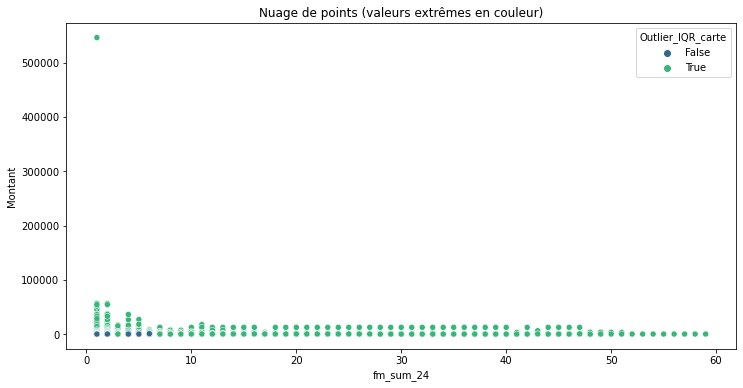

In [18]:
#Graphiques

# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='fm_redondance_mcc_24', y='montant', hue='Outlier_IQR_carte', palette='viridis')
plt.xlabel('fm_sum_24')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

### Méthode 2: Identification des outliers avec Z-score

## Méthode du z-score

La méthode du z-score est une autre approche courante pour identifier les valeurs aberrantes dans des données univariées. Elle utilise l'écart à la moyenne pour définir une plage de valeurs plausibles et identifie les observations qui sont en dehors de cette plage.

### Définition

Le z-score est défini comme la différence entre une observation et la moyenne de la distribution des données, divisée par l'écart-type de la distribution :

z = (x - μ) / σ

Les bornes inférieure et supérieure de la plage plausible sont définies comme suit :

- Limite inférieure : μ - 3 x σ
- Limite supérieure : μ + 3 x σ

Les observations en dehors de ces bornes sont considérées comme des valeurs aberrantes.

### Avantages

La méthode du z-score est également relativement simple à comprendre et à implémenter. Elle est également assez robuste aux valeurs aberrantes, car elle utilise la moyenne et l'écart-type pour calculer les bornes plausibles.

### Inconvénients

Comme pour la méthode de l'IQR, la méthode du z-score peut ne pas fonctionner correctement dans certaines distributions non symétriques. Elle peut également ne pas fonctionner correctement si les données contiennent de nombreux points de données aberrants.

In [19]:
# Fonction pour détecter les outliers en utilisant le z-score
def detect_outliers_zscore(data, column, threshold=10):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    return data[np.abs(z_scores) > threshold]

outliers_index=[]
z=0
for i in var_num:
    
    # Trouver les outliers pour la colonne 'PRICE'
    outliers = detect_outliers_zscore(cleaned_df, i)
    outliers_index+=list(outliers.index)
    # Afficher les outliers
    z+=len(outliers)
    print(f"Outliers détectés pour la variable {i}: {len(outliers)}")

outliers_index = list(pd.DataFrame(outliers_index)[0].unique())    

cleaned_df['Outlier_z'] = False
cleaned_df.loc[outliers_index, 'Outlier_z'] = True

carte_outliers = list(cleaned_df[cleaned_df['Outlier_z']==True]['carte'])
z_carte_index = cleaned_df[cleaned_df['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(z_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")

Outliers détectés pour la variable montant: 532
Outliers détectés pour la variable fm_sum_3: 613
Outliers détectés pour la variable fm_sum_6: 661
Outliers détectés pour la variable fm_sum_12: 730
Outliers détectés pour la variable fm_sum_24: 517
Outliers détectés pour la variable fm_redondance_mcc_3: 1520
Outliers détectés pour la variable fm_redondance_mcc_6: 2389
Outliers détectés pour la variable fm_redondance_mcc_12: 1800
Outliers détectés pour la variable fm_redondance_mcc_24: 1492
Outliers détectés pour la variable fm_difference_pays_3: 1524
Outliers détectés pour la variable fm_difference_pays_6: 1239
Outliers détectés pour la variable fm_difference_pays_12: 1925
Outliers détectés pour la variable fm_difference_pays_24: 1981

Nombre totale de lignes correspondantes pour chaque outliers : 6692

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 33313


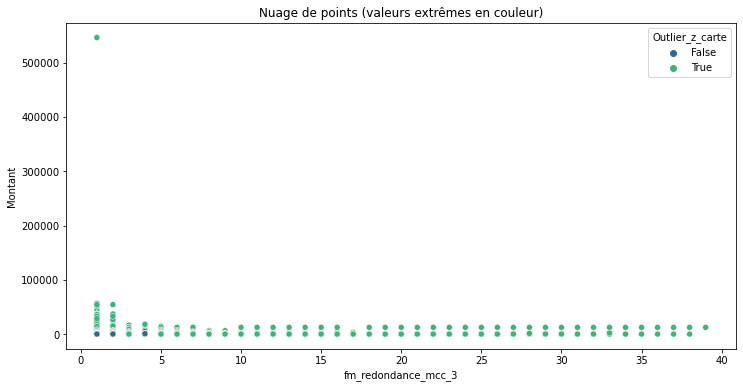

In [20]:
#Graphiques

# Ajouter une colonne pour indiquer si la valeur est extrême
cleaned_df['Outlier_z_carte'] = False
cleaned_df.loc[z_carte_index, 'Outlier_z_carte'] = True

# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_df, x='fm_redondance_mcc_3', y='montant', hue='Outlier_z_carte', palette='viridis')
plt.xlabel('fm_redondance_mcc_3')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

In [21]:
cleaned_df_sans_outliers=cleaned_df[cleaned_df['Outlier_z_carte']==False]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 0.53 %


### Méthode 3: Isolation Forest

L'Isolation Forest est une méthode d'apprentissage automatique non supervisée pour identifier les valeurs aberrantes dans des données univariées et multivariées. **Elle fonctionne en construisant plusieurs arbres de décision aléatoires** et en calculant un score d'anomalie pour chaque observation en fonction de la profondeur moyenne à laquelle elle est isolée des autres observations.

### Définition

**L'Isolation Forest est basée sur l'idée que les valeurs aberrantes sont plus faciles à isoler que les valeurs normales**. Elle construit plusieurs arbres de décision aléatoires et divise les données en sous-ensembles aléatoires à chaque nœud. L'algorithme isole les observations en fonction de la profondeur moyenne à laquelle elles sont isolées par rapport aux autres observations. Les observations qui sont isolées plus rapidement que la moyenne sont considérées comme des valeurs aberrantes.

### Avantages

**L'Isolation Forest est capable de détecter les valeurs aberrantes dans des données univariées et multivariées**. Elle fonctionne également bien avec des **distributions non symétriques** et est assez robuste aux valeurs aberrantes. 


### Inconvénients

L'Isolation Forest peut être sensible aux paramètres tels que le nombre d'arbres et la taille des sous-échantillons. De plus, elle peut parfois être difficile à interpréter, en particulier pour les données multivariées.


In [22]:
from sklearn.ensemble import IsolationForest

data = cleaned_df[var_num].copy()

# Appliquer l'Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(data)

data['carte']=cleaned_df['carte']

# Ajouter les labels d'anomalie au DataFrame
data['Outlier'] = outlier_labels

# Afficher les outliers
outliers = data[data['Outlier'] == -1]

carte_outliers = list(data[data['Outlier']==-1]['carte'])
iso_carte_index = data[data['carte'].isin(carte_outliers)].index

count_unique_index = len(outliers)  
print(f"\nNombre totale de lignes correspondantes pour chaque outliers : {count_unique_index}")
count_unique_index = len(iso_carte_index)  
print(f"\nNombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: {count_unique_index}")

c:\Users\lulil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Nombre totale de lignes correspondantes pour chaque outliers : 114957

Nombre totale de lignes correspondantes pour chaque carte où au moins une transaction est un outliers: 555556


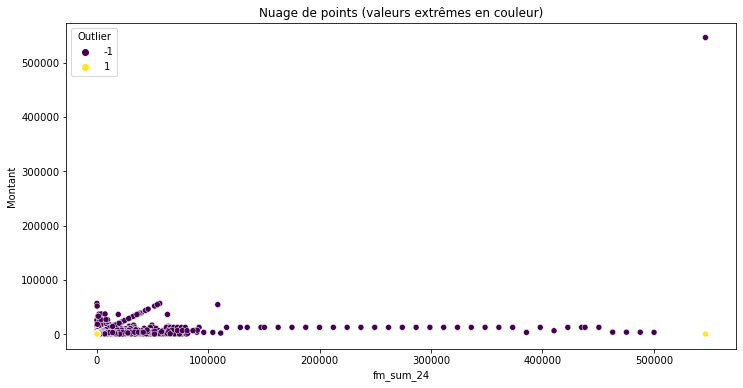

In [23]:
#Graphiques
data['fraude']=cleaned_df['fraude']
# Créer un nuage de points (scatter plot) avec Seaborn en mettant en évidence les valeurs extrêmes

# Ajouter une colonne pour indiquer si la valeur est extrême
data['Outlier_iso_carte'] = False
data.loc[iso_carte_index, 'Outlier_iso_carte'] = True

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='fm_sum_24', y='montant', hue='Outlier', palette='viridis')
plt.xlabel('fm_sum_24')
plt.ylabel('Montant')
plt.title("Nuage de points (valeurs extrêmes en couleur)")
plt.show()

In [24]:
cleaned_df_sans_outliers=data[data['Outlier_iso_carte']==1]

count_1 = list(cleaned_df[["fraude"]].value_counts(normalize=False))
count_1 = (count_1[1]/count_1[0])*100
count_2 = list(cleaned_df_sans_outliers[["fraude"]].value_counts(normalize=False))
count_2 = (count_2[1]/count_2[0])*100

print(f'Fraudes avant supression des outliers : {round(count_1,2)} %')
print(f'Fraudes après supression des outliers : {round(count_2,2)} %')

Fraudes avant supression des outliers : 0.63 %
Fraudes après supression des outliers : 1.11 %


### Solutions pour traiter les valeurs extrêmes

| Type de valeur aberrante | Solutions pour les traiter                                                                                              |
|--------------------------|------------------------------------------------------------------------------------------------------------------------|
| Erreur                   | 1. Correction de l'erreur si possible (ex. erreurs de saisie)                                                           |
|                          | 2. Suppression de l'observation si la correction n'est pas possible et si l'erreur est clairement une anomalie 
|                          | 3. Remplacer par une valeur manquante et imputer avec les techniques d'imputation
|                          |      |
| Extrême                  | 1. Transformation des données (ex. logarithmique, racine carrée) pour réduire l'impact des valeurs extrêmes             |
|                          | 2. Winsorisation : remplacer les valeurs extrêmes par des percentiles spécifiques (ex. 1er et 99e percentiles)          |
|                         
|                          | 3. Utiliser des modèles d'apprentissage automatique robustes aux valeurs extrêmes (ex. modèles basés sur les rangs)     |
|                          | 4. Discrétiser la variable   |
|                          | 5. Faire le modèle avec et sans les valeurs extrêmes et analyser l'impact   |

- Choisir la méthode qui nous parrait la plus a adapter
- Et voir laquelle des solutions est la plus adapter (préférence pour la 5 qui est souvent recommander)

## II - Sélection de variables pour la modélisation

In [25]:
cleaned_df.drop(columns=['carte'],inplace=True)

In [26]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,pays,coderep,mcc,montant,fraude,fm_velocity_condition_3,fm_velocity_condition_6,fm_velocity_condition_12,fm_velocity_condition_24,fm_sum_3,fm_sum_6,fm_sum_12,fm_sum_24,fm_redondance_mcc_3,fm_redondance_mcc_6,fm_redondance_mcc_12,fm_redondance_mcc_24,fm_difference_pays_3,fm_difference_pays_6,fm_difference_pays_12,fm_difference_pays_24,jour,mois,année,plage_horaire,Outlier_IQR,Outlier_IQR_carte,Outlier_z,Outlier_z_carte
0,840,15,5812,69.25,0.0,0,0,0,0,69.25,69.25,69.25,69.25,1,1,1,1,1,1,1,1,2,12,2003,15-18h,False,False,False,False
1,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,25,11,2003,6-9h,False,False,False,False
2,826,15,5211,516.95,0.0,0,0,0,0,516.95,516.95,516.95,516.95,1,1,1,1,1,1,1,1,12,11,2003,12-15h,False,False,False,False
3,840,14,7399,0.01,0.0,0,0,0,0,0.01,0.01,0.01,0.01,1,1,1,1,1,1,1,1,7,11,2003,3-6h,False,False,False,False
4,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,23,11,2003,3-6h,False,False,False,False
5,158,15,5311,1.00,0.0,0,0,0,0,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,17,11,2003,0-3h,False,False,False,False
6,840,15,5969,48.46,0.0,0,0,0,0,48.46,48.46,48.46,48.46,1,1,1,1,1,1,1,1,3,12,2003,0-3h,False,False,False,False
7,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,96.50,1,1,1,2,1,1,1,1,4,12,2003,0-3h,False,False,False,False
8,840,15,5969,48.32,0.0,0,0,0,0,48.32,48.32,48.32,48.32,1,1,1,1,1,1,1,1,5,12,2003,0-3h,False,False,False,False
9,840,15,5969,48.18,0.0,0,0,0,0,48.18,48.18,48.18,96.78,1,1,1,2,1,1,1,1,6,12,2003,0-3h,False,False,False,False


In [27]:
cleaned_df.drop(columns=['Outlier_IQR','Outlier_IQR_carte','Outlier_z','Outlier_z_carte'],inplace=True)

### Variables qualitatives

#### Test du Chi2

##### Rappels sur le test du Chi2

Le test du Chi carré est une méthode statistique utilisée pour tester la relation entre deux variables qualitatives à partir d'un échantillon de données. Le but du test du Chi deux est de comparer les fréquences observées des éléments dans un tableau de fréquences avec les fréquences attendues s'il n'y avait aucune relation entre les deux variables. Le test du chi carré comprend 2 hypothèses :
- Hypothèse nulle (H0) : Affirme qu'il n'y a pas de relation entre deux variables.
- Hypothèse alternative (H1) : prétend qu'il existe une relation entre deux variables.

Statistique Chi2 (valeur du chi carré) : est la somme des écarts au carré entre la fréquence observée et la fréquence attendue, donc si la valeur du chi carré est grande, cela signifie qu'il y a une différence significative entre les fréquences observées et attendues, et nous avons suffisamment de preuves rejeter l’hypothèse nulle.

Si la valeur p est inférieure au niveau de signification (alpha), alors nous disposons de suffisamment de preuves pour rejeter l'hypothèse nulle et conclure qu'il existe une relation significative entre les variables. Au contraire, si la valeur p est supérieure ou égale à alpha, alors les preuves sont insuffisantes pour rejeter l’hypothèse nulle et nous ne pouvons pas conclure à l’existence d’une relation significative entre les variables.

In [28]:
def Chi2_Test(df, Var1, Var2):
    # Création d'une table de contingence pour les deux variables catégorielles
    contingency_table = pd.crosstab(df[Var1], df[Var2])

    # Test du Chi2 d'indépendance
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Affichage des résultats du test
    if p_val> 0.05:
        print(f"Test du Chi2 (Chi-carré) de la relation entre la {Var1} et {Var2} :")
        print("Statistique Chi2 :", chi2_stat)
        print("p-value :", p_val)
        print("Degrés de liberté :", dof)
    else:
        print('Done ! No problem.')

In [29]:
vars_qual = cleaned_df.describe(include="category").columns

In [30]:
vars_qual

Index(['pays', 'coderep', 'mcc', 'jour', 'mois', 'année', 'plage_horaire'], dtype='object')

In [31]:
#Test du Chi2 avec toutes les variables

for var1 in vars_qual:
    for var2 in vars_qual:
        Chi2_Test(cleaned_df, var1, var2) 

Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.
Done ! No problem.


#### V de CRAMER


Test du Chi-deux entre pays et pays:
Statistique de Chi-deux : 191137712.0
P-valeur : 0.0
Degrés de liberté : 27556

V de Cramer : 1.0

Test du Chi-deux entre coderep et coderep:
Statistique de Chi-deux : 16120048.0
P-valeur : 0.0
Degrés de liberté : 196

V de Cramer : 1.0

Test du Chi-deux entre mcc et mcc:
Statistique de Chi-deux : 759945120.0
P-valeur : 0.0
Degrés de liberté : 435600

V de Cramer : 1.0

Test du Chi-deux entre jour et jour:
Statistique de Chi-deux : 34542960.0
P-valeur : 0.0
Degrés de liberté : 900

V de Cramer : 1.0

Test du Chi-deux entre mois et mois:
Statistique de Chi-deux : 8060024.0
P-valeur : 0.0
Degrés de liberté : 49

V de Cramer : 1.0

Test du Chi-deux entre mois et année:
Statistique de Chi-deux : 1151432.0
P-valeur : 0.0
Degrés de liberté : 7

V de Cramer : 1.0

Test du Chi-deux entre année et mois:
Statistique de Chi-deux : 1151432.0
P-valeur : 0.0
Degrés de liberté : 7

V de Cramer : 1.0

Test du Chi-deux entre année et année:
Statistique de Chi-deux 

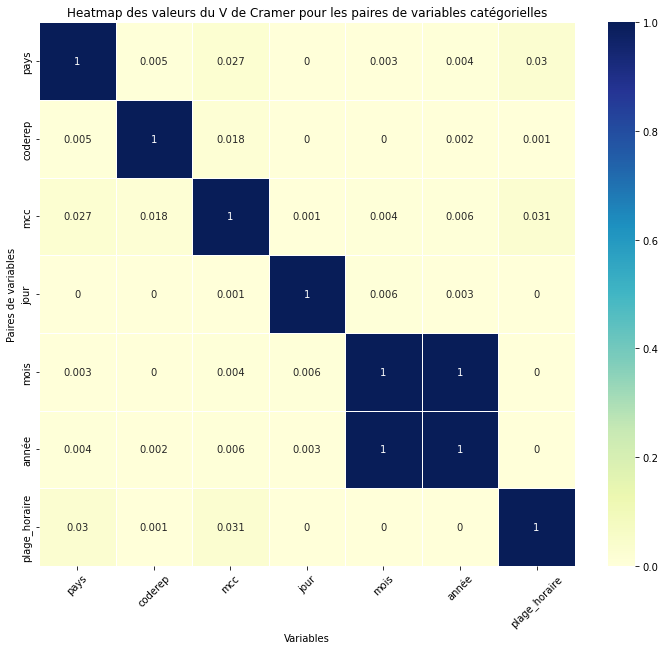

In [32]:
v_cramer_values1 = []

for var1 in vars_qual:
    v_cramer_values2 = []
    for var2 in vars_qual:
        
        # Créer un tableau de contingence
        contingency_table = pd.crosstab(cleaned_df[var1], cleaned_df[var2])

        # Test du Chi-deux pour évaluer l'indépendance
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Calcul du V de Cramer
        n = contingency_table.sum().sum()
        r, c = contingency_table.shape
        cramer_v = (chi2 / n) / min(r - 1, c - 1)
        cramer_v = round(cramer_v, 3)  # Arrondir à trois décimales
        v_cramer_values2.append(cramer_v)
       
        if cramer_v > 0.3:
            print(f"\nTest du Chi-deux entre {var1} et {var2}:")
            print("Statistique de Chi-deux :", chi2)
            print("P-valeur :", p)
            print("Degrés de liberté :", dof)
            print("\nV de Cramer :", cramer_v)
            
    v_cramer_values1.append(v_cramer_values2)
        
# Créer un DataFrame des valeurs du V de Cramer
v_cramer_db = pd.DataFrame(v_cramer_values1, columns=vars_qual, index=vars_qual)    
     
            
# Créer une heatmap des valeurs du V de Cramer
plt.figure(figsize=(12, 10))
sns.heatmap(v_cramer_db, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Heatmap des valeurs du V de Cramer pour les paires de variables catégorielles")
plt.xlabel("Variables")
plt.ylabel("Paires de variables")
plt.xticks(rotation=45)
plt.show()


In [33]:
cleaned_df.drop(columns=['année'],inplace=True)

Les variables  qualitatives ont toutes des valeurs p très faibles et sont toutes inférieures à 0,05. Sauf année et mois, on a donc supprimé année.

### Variables quantitatives

#### Vérification de la colinéarité

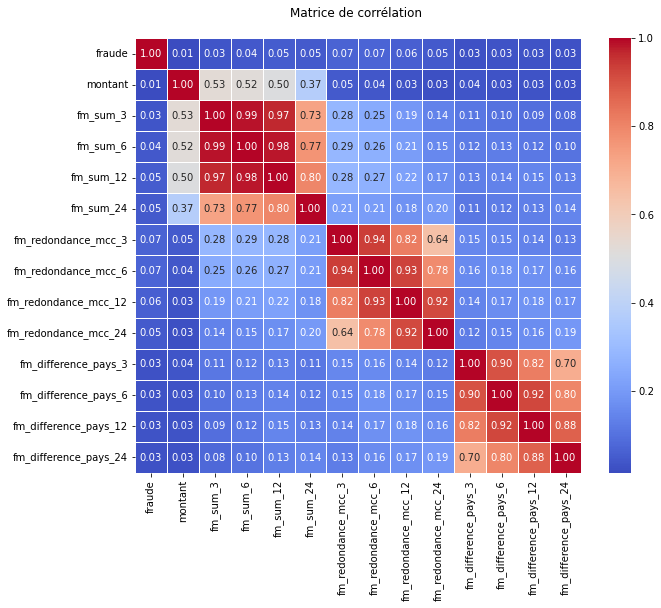

In [34]:
# Matrice de corrélation

plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df[['fraude']+var_num].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation \n')
plt.show()

In [35]:
var_quant = list(cleaned_df.describe().columns)
db_quant=cleaned_df[var_quant]
# Calculer la matrice de corrélation de Pearson
correlation_matrix = db_quant.corr(method='pearson')

# Sélectionner les paires de variables avec un coefficient de corrélation supérieur à 0.3 ou inférieur à -0.3
high_correlation_pairs = correlation_matrix[(correlation_matrix > 0.3) | (correlation_matrix < -0.3)]
 # Exclure la corrélation parfaite de 1.0

# Afficher les paires de variables avec un coefficient de corrélation supérieur à 0.3 ou inférieur à -0.3
print("Paires de variables avec un coefficient de corrélation supérieur à 0.3 ou inférieur à -0.3 :")
for col in high_correlation_pairs:
    correlated_vars = high_correlation_pairs[col].dropna()
    for idx in correlated_vars.index:
        if abs(correlation_matrix.loc[idx, col]) > 0.3:  # Exclure les corrélations plus faibles que |0.3|
            print(f"{idx} - {col}: {correlation_matrix.loc[idx, col]}")

Paires de variables avec un coefficient de corrélation supérieur à 0.3 ou inférieur à -0.3 :
montant - montant: 1.0
fm_sum_3 - montant: 0.5283903842499802
fm_sum_6 - montant: 0.5188971312438195
fm_sum_12 - montant: 0.5025486962505243
fm_sum_24 - montant: 0.37435786684063715
fraude - fraude: 1.0
fm_velocity_condition_3 - fm_velocity_condition_3: 1.0
fm_velocity_condition_6 - fm_velocity_condition_3: 0.9164183686178019
fm_velocity_condition_12 - fm_velocity_condition_3: 0.8195127656718704
fm_velocity_condition_24 - fm_velocity_condition_3: 0.66653388145446
fm_redondance_mcc_3 - fm_velocity_condition_3: 0.3908462626130678
fm_redondance_mcc_6 - fm_velocity_condition_3: 0.40392421804430645
fm_redondance_mcc_12 - fm_velocity_condition_3: 0.36281630045131313
fm_difference_pays_3 - fm_velocity_condition_3: 0.44381567064537025
fm_difference_pays_6 - fm_velocity_condition_3: 0.4075215799108834
fm_difference_pays_12 - fm_velocity_condition_3: 0.3680048054188632
fm_difference_pays_24 - fm_velocity

Les variables fm sont très corrélés de chaque sous catégories sont corrélés entre elles. Ce qui peut poser problème lors de la modélisation. Il faudrais garder uniquement les fm sur les dernières 24 heures. Elles sont moins corrélés aux autres varaibles et continenent l'information contenue à 3, 6, et 12 heure. 

In [36]:
var_quant

['montant',
 'fraude',
 'fm_velocity_condition_3',
 'fm_velocity_condition_6',
 'fm_velocity_condition_12',
 'fm_velocity_condition_24',
 'fm_sum_3',
 'fm_sum_6',
 'fm_sum_12',
 'fm_sum_24',
 'fm_redondance_mcc_3',
 'fm_redondance_mcc_6',
 'fm_redondance_mcc_12',
 'fm_redondance_mcc_24',
 'fm_difference_pays_3',
 'fm_difference_pays_6',
 'fm_difference_pays_12',
 'fm_difference_pays_24']

In [37]:
cleaned_df.drop(columns=[
 'fm_velocity_condition_3',
 'fm_velocity_condition_6',
 'fm_velocity_condition_12',
 'fm_sum_3',
 'fm_sum_6',
 'fm_sum_12',
 'fm_redondance_mcc_3',
 'fm_redondance_mcc_6',
 'fm_redondance_mcc_12',
 'fm_difference_pays_3',
 'fm_difference_pays_6',
 'fm_difference_pays_12'],inplace=True)

In [38]:
var_quant

['montant',
 'fraude',
 'fm_velocity_condition_3',
 'fm_velocity_condition_6',
 'fm_velocity_condition_12',
 'fm_velocity_condition_24',
 'fm_sum_3',
 'fm_sum_6',
 'fm_sum_12',
 'fm_sum_24',
 'fm_redondance_mcc_3',
 'fm_redondance_mcc_6',
 'fm_redondance_mcc_12',
 'fm_redondance_mcc_24',
 'fm_difference_pays_3',
 'fm_difference_pays_6',
 'fm_difference_pays_12',
 'fm_difference_pays_24']

In [39]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

cleaned_df.head(10)

,pays,coderep,mcc,montant,fraude,fm_velocity_condition_24,fm_sum_24,fm_redondance_mcc_24,fm_difference_pays_24,jour,mois,plage_horaire
0,840,15,5812,69.25,0.0,0,69.25,1,1,2,12,15-18h
1,158,15,5311,1.00,0.0,0,1.00,1,1,25,11,6-9h
2,826,15,5211,516.95,0.0,0,516.95,1,1,12,11,12-15h
3,840,14,7399,0.01,0.0,0,0.01,1,1,7,11,3-6h
4,158,15,5311,1.00,0.0,0,1.00,1,1,23,11,3-6h
5,158,15,5311,1.00,0.0,0,1.00,1,1,17,11,0-3h
6,840,15,5969,48.46,0.0,0,48.46,1,1,3,12,0-3h
7,840,15,5969,48.32,0.0,0,96.50,2,1,4,12,0-3h
8,840,15,5969,48.32,0.0,0,48.32,1,1,5,12,0-3h
9,840,15,5969,48.18,0.0,0,96.78,2,1,6,12,0-3h


## III - Formatage et séparation du jeu de données

In [40]:
train_data, test_data = split_data(cleaned_df, test_size=0.2, random_state=42,zip_path='../data/train_test_split.zip')

In [41]:
train_data.head()

,pays,coderep,mcc,montant,fraude,fm_velocity_condition_24,fm_sum_24,fm_redondance_mcc_24,fm_difference_pays_24,jour,mois,plage_horaire
874651,258,00,7512,41.48,0.0,1,41.48,1,1,12,3,18-21h
556074,840,00,8699,1.00,0.0,1,1.00,1,1,6,1,21-00h
633010,724,00,5946,104.17,0.0,1,104.17,1,1,1,2,12-15h
721705,756,00,5542,64.14,0.0,1,64.14,1,1,25,11,15-18h
32425,196,00,5411,17.87,0.0,3,127.06,2,1,23,1,15-18h


In [42]:
# Tableau récapitulatifs sur les modalités de chaques variables qualitatives
vars_qual = cleaned_df.describe(include="category").columns
df_dtypes = cleaned_df[vars_qual].dtypes.reset_index().rename(columns={'index':'Champ',0:'Type'})
df_dtypes

for i in cleaned_df.columns:
    df_dtypes.loc[df_dtypes['Champ']==i,'Modalités'] = str(sorted(cleaned_df[i].unique().tolist()))
    df_dtypes.loc[df_dtypes['Champ']==i,'NbDistinctVal'] = cleaned_df[i].nunique()
    
df_dtypes

,Champ,Type,Modalités,NbDistinctVal
0,pays,category,"['008', '012', '020', '028', '031', '032', '03...",167.0
1,coderep,category,"['00', '02', '05', '07', '14', '15', '30', '41...",15.0
2,mcc,category,"['0000', '0001', '0004', '0100', '0596', '0741...",661.0
3,jour,category,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31.0
4,mois,category,"[1, 2, 3, 4, 5, 6, 11, 12]",8.0
5,plage_horaire,category,"['0-3h', '12-15h', '15-18h', '18-21h', '21-00h...",8.0


In [43]:
vars_qual = list(vars_qual)
vars_qual.remove('coderep')

In [44]:
for i in vars_qual:  
    
    dummies = pd.get_dummies(cleaned_df[i], prefix=i) #drop_first=True colinéarité ?

    # Concaténez les variables indicatrices avec le DataFrame d'origine
    cleaned_df = pd.concat([cleaned_df, dummies.iloc[:,:-1]], axis=1)
    cleaned_df = cleaned_df.drop([i],axis=1)

In [45]:
cleaned_df['coderep'] = cleaned_df['coderep'].apply(lambda x: 0 if x == '00' else 1)

In [47]:
train_dummies_data, test_dummies_data = split_data(cleaned_df, test_size=0.2, random_state=42,zip_path='../data/train_test_dummies_split.zip')

In [48]:
train_dummies_data.head()

,coderep,montant,fraude,fm_velocity_condition_24,fm_sum_24,fm_redondance_mcc_24,fm_difference_pays_24,pays_008,pays_012,pays_020,pays_028,pays_031,pays_032,pays_036,pays_040,pays_044,pays_048,pays_050,pays_051,pays_052,pays_056,pays_060,pays_068,pays_070,pays_072,pays_076,pays_084,pays_092,pays_096,pays_100,pays_112,pays_116,pays_120,pays_124,pays_136,pays_144,pays_152,pays_156,pays_158,pays_170,pays_175,pays_184,pays_188,pays_191,pays_192,pays_196,pays_203,pays_204,pays_208,pays_212,pays_214,pays_218,pays_222,pays_231,pays_233,pays_242,pays_246,pays_254,pays_258,pays_262,pays_266,pays_268,pays_275,pays_276,pays_288,pays_300,pays_308,pays_312,pays_316,pays_320,pays_324,pays_328,pays_332,pays_340,pays_344,pays_348,pays_352,pays_356,pays_360,pays_372,pays_376,pays_380,pays_384,pays_388,pays_392,pays_398,pays_400,pays_404,pays_410,pays_414,pays_418,pays_422,pays_428,pays_440,pays_442,pays_446,pays_450,pays_458,pays_462,pays_466,pays_470,pays_474,pays_480,pays_484,pays_492,pays_496,pays_498,pays_504,pays_508,pays_512,pays_524,pays_528,pays_530,pays_533,pays_540,pays_548,pays_554,pays_558,pays_578,pays_586,pays_591,pays_598,pays_600,pays_604,pays_608,pays_616,pays_620,pays_630,pays_634,pays_638,pays_642,pays_643,pays_659,pays_660,pays_662,pays_666,pays_670,pays_682,pays_686,pays_690,pays_702,pays_703,pays_704,pays_705,pays_710,pays_716,pays_724,pays_752,pays_756,pays_760,pays_764,pays_768,pays_780,pays_784,pays_788,pays_792,pays_795,pays_796,pays_804,pays_807,pays_818,pays_826,pays_834,pays_840,pays_850,pays_854,pays_858,pays_860,pays_862,pays_882,pays_891,pays_894,pays_900,mcc_0000,mcc_0001,mcc_0004,mcc_0100,mcc_0596,mcc_0741,mcc_0742,mcc_0763,mcc_0780,mcc_0799,mcc_0880,mcc_1168,mcc_1511,mcc_1520,mcc_1711,mcc_1731,mcc_1740,mcc_1750,mcc_1761,mcc_1771,mcc_1799,mcc_2020,mcc_2741,mcc_2791,mcc_2829,mcc_2842,mcc_2881,mcc_3000,mcc_3001,mcc_3005,mcc_3006,mcc_3007,mcc_3008,mcc_3009,mcc_3010,mcc_3011,mcc_3012,mcc_3013,mcc_3014,mcc_3015,mcc_3016,mcc_3017,mcc_3018,mcc_3020,mcc_3021,mcc_3022,mcc_3023,mcc_3024,mcc_3025,mcc_3026,mcc_3028,mcc_3029,mcc_3030,mcc_3031,mcc_3032,mcc_3034,mcc_3035,mcc_3036,mcc_3037,mcc_3038,mcc_3039,mcc_3040,mcc_3042,mcc_3043,mcc_3044,mcc_3047,mcc_3048,mcc_3049,mcc_3050,mcc_3051,mcc_3052,mcc_3055,mcc_3058,mcc_3059,mcc_3060,mcc_3061,mcc_3063,mcc_3064,mcc_3066,mcc_3075,mcc_3076,mcc_3077,mcc_3078,mcc_3082,mcc_3085,mcc_3088,mcc_3097,mcc_3098,mcc_3099,mcc_3100,mcc_3102,mcc_3103,mcc_3106,mcc_3111,mcc_3112,mcc_3117,mcc_3125,mcc_3127,mcc_3129,mcc_3136,mcc_3142,mcc_3144,mcc_3146,mcc_3148,mcc_3161,mcc_3167,mcc_3171,mcc_3174,mcc_3175,mcc_3177,mcc_3181,mcc_3182,mcc_3184,mcc_3185,mcc_3187,mcc_3188,mcc_3190,mcc_3192,mcc_3193,mcc_3196,mcc_3206,mcc_3217,mcc_3219,mcc_3234,mcc_3248,mcc_3251,mcc_3252,mcc_3253,mcc_3256,mcc_3259,mcc_3261,mcc_3263,mcc_3266,mcc_3287,mcc_3292,mcc_3294,mcc_3295,mcc_3297,mcc_3298,mcc_3299,mcc_3333,mcc_3351,mcc_3357,mcc_3359,mcc_3364,mcc_3366,mcc_3368,mcc_3370,mcc_3381,mcc_3387,mcc_3388,mcc_3389,mcc_3390,mcc_3393,mcc_3394,mcc_3395,mcc_3396,mcc_3405,mcc_3409,mcc_3412,mcc_3420,mcc_3434,mcc_3438,mcc_3441,mcc_3501,mcc_3502,mcc_3503,mcc_3504,mcc_3505,mcc_3506,mcc_3507,mcc_3508,mcc_3509,mcc_3510,mcc_3511,mcc_3512,mcc_3513,mcc_3514,mcc_3515,mcc_3516,mcc_3517,mcc_3518,mcc_3519,mcc_3520,mcc_3523,mcc_3524,mcc_3526,mcc_3529,mcc_3530,mcc_3533,mcc_3534,mcc_3535,mcc_3537,mcc_3538,mcc_3539,mcc_3540,mcc_3541,mcc_3542,mcc_3543,mcc_3544,mcc_3545,mcc_3548,mcc_3551,mcc_3552,mcc_3553,mcc_3555,mcc_3558,mcc_3561,mcc_3562,mcc_3563,mcc_3565,mcc_3567,mcc_3568,mcc_3569,mcc_3570,mcc_3572,mcc_3574,mcc_3575,mcc_3577,mcc_3579,mcc_3581,mcc_3583,mcc_3584,mcc_3587,mcc_3588,mcc_3590,mcc_3591,mcc_3592,mcc_3595,mcc_3598,mcc_3599,mcc_3612,mcc_3615,mcc_3623,mcc_3624,mcc_3625,mcc_3628,mcc_3629,mcc_3631,mcc_3634,mcc_3635,mcc_3637,mcc_3638,mcc_3639,mcc_3640,mcc_3641,mcc_3642,mcc_3643,mcc_3644,mcc_3645,mcc_3646,mcc_3647,mcc_3649,mcc_3650,mcc_3652,mcc_3653,mcc_3654,mcc_3655,mcc_3657,mcc_3658,mcc_3659,mcc_3661,mcc_3662,mcc_3663,mcc_3665,mcc_3667,mcc_3668,m

In [50]:
train_dummies_data.to_csv('../data/train_dummies_data.parquet', index=False)
test_dummies_data.to_csv('../data/test_dummies_data.parquet', index=False)

In [49]:
# Aperçu du jeu de données

pd.options.display.max_columns = None
pd.options.display.max_rows = None

train_dummies_data.head(10)

,coderep,montant,fraude,fm_velocity_condition_24,fm_sum_24,fm_redondance_mcc_24,fm_difference_pays_24,pays_008,pays_012,pays_020,pays_028,pays_031,pays_032,pays_036,pays_040,pays_044,pays_048,pays_050,pays_051,pays_052,pays_056,pays_060,pays_068,pays_070,pays_072,pays_076,pays_084,pays_092,pays_096,pays_100,pays_112,pays_116,pays_120,pays_124,pays_136,pays_144,pays_152,pays_156,pays_158,pays_170,pays_175,pays_184,pays_188,pays_191,pays_192,pays_196,pays_203,pays_204,pays_208,pays_212,pays_214,pays_218,pays_222,pays_231,pays_233,pays_242,pays_246,pays_254,pays_258,pays_262,pays_266,pays_268,pays_275,pays_276,pays_288,pays_300,pays_308,pays_312,pays_316,pays_320,pays_324,pays_328,pays_332,pays_340,pays_344,pays_348,pays_352,pays_356,pays_360,pays_372,pays_376,pays_380,pays_384,pays_388,pays_392,pays_398,pays_400,pays_404,pays_410,pays_414,pays_418,pays_422,pays_428,pays_440,pays_442,pays_446,pays_450,pays_458,pays_462,pays_466,pays_470,pays_474,pays_480,pays_484,pays_492,pays_496,pays_498,pays_504,pays_508,pays_512,pays_524,pays_528,pays_530,pays_533,pays_540,pays_548,pays_554,pays_558,pays_578,pays_586,pays_591,pays_598,pays_600,pays_604,pays_608,pays_616,pays_620,pays_630,pays_634,pays_638,pays_642,pays_643,pays_659,pays_660,pays_662,pays_666,pays_670,pays_682,pays_686,pays_690,pays_702,pays_703,pays_704,pays_705,pays_710,pays_716,pays_724,pays_752,pays_756,pays_760,pays_764,pays_768,pays_780,pays_784,pays_788,pays_792,pays_795,pays_796,pays_804,pays_807,pays_818,pays_826,pays_834,pays_840,pays_850,pays_854,pays_858,pays_860,pays_862,pays_882,pays_891,pays_894,pays_900,mcc_0000,mcc_0001,mcc_0004,mcc_0100,mcc_0596,mcc_0741,mcc_0742,mcc_0763,mcc_0780,mcc_0799,mcc_0880,mcc_1168,mcc_1511,mcc_1520,mcc_1711,mcc_1731,mcc_1740,mcc_1750,mcc_1761,mcc_1771,mcc_1799,mcc_2020,mcc_2741,mcc_2791,mcc_2829,mcc_2842,mcc_2881,mcc_3000,mcc_3001,mcc_3005,mcc_3006,mcc_3007,mcc_3008,mcc_3009,mcc_3010,mcc_3011,mcc_3012,mcc_3013,mcc_3014,mcc_3015,mcc_3016,mcc_3017,mcc_3018,mcc_3020,mcc_3021,mcc_3022,mcc_3023,mcc_3024,mcc_3025,mcc_3026,mcc_3028,mcc_3029,mcc_3030,mcc_3031,mcc_3032,mcc_3034,mcc_3035,mcc_3036,mcc_3037,mcc_3038,mcc_3039,mcc_3040,mcc_3042,mcc_3043,mcc_3044,mcc_3047,mcc_3048,mcc_3049,mcc_3050,mcc_3051,mcc_3052,mcc_3055,mcc_3058,mcc_3059,mcc_3060,mcc_3061,mcc_3063,mcc_3064,mcc_3066,mcc_3075,mcc_3076,mcc_3077,mcc_3078,mcc_3082,mcc_3085,mcc_3088,mcc_3097,mcc_3098,mcc_3099,mcc_3100,mcc_3102,mcc_3103,mcc_3106,mcc_3111,mcc_3112,mcc_3117,mcc_3125,mcc_3127,mcc_3129,mcc_3136,mcc_3142,mcc_3144,mcc_3146,mcc_3148,mcc_3161,mcc_3167,mcc_3171,mcc_3174,mcc_3175,mcc_3177,mcc_3181,mcc_3182,mcc_3184,mcc_3185,mcc_3187,mcc_3188,mcc_3190,mcc_3192,mcc_3193,mcc_3196,mcc_3206,mcc_3217,mcc_3219,mcc_3234,mcc_3248,mcc_3251,mcc_3252,mcc_3253,mcc_3256,mcc_3259,mcc_3261,mcc_3263,mcc_3266,mcc_3287,mcc_3292,mcc_3294,mcc_3295,mcc_3297,mcc_3298,mcc_3299,mcc_3333,mcc_3351,mcc_3357,mcc_3359,mcc_3364,mcc_3366,mcc_3368,mcc_3370,mcc_3381,mcc_3387,mcc_3388,mcc_3389,mcc_3390,mcc_3393,mcc_3394,mcc_3395,mcc_3396,mcc_3405,mcc_3409,mcc_3412,mcc_3420,mcc_3434,mcc_3438,mcc_3441,mcc_3501,mcc_3502,mcc_3503,mcc_3504,mcc_3505,mcc_3506,mcc_3507,mcc_3508,mcc_3509,mcc_3510,mcc_3511,mcc_3512,mcc_3513,mcc_3514,mcc_3515,mcc_3516,mcc_3517,mcc_3518,mcc_3519,mcc_3520,mcc_3523,mcc_3524,mcc_3526,mcc_3529,mcc_3530,mcc_3533,mcc_3534,mcc_3535,mcc_3537,mcc_3538,mcc_3539,mcc_3540,mcc_3541,mcc_3542,mcc_3543,mcc_3544,mcc_3545,mcc_3548,mcc_3551,mcc_3552,mcc_3553,mcc_3555,mcc_3558,mcc_3561,mcc_3562,mcc_3563,mcc_3565,mcc_3567,mcc_3568,mcc_3569,mcc_3570,mcc_3572,mcc_3574,mcc_3575,mcc_3577,mcc_3579,mcc_3581,mcc_3583,mcc_3584,mcc_3587,mcc_3588,mcc_3590,mcc_3591,mcc_3592,mcc_3595,mcc_3598,mcc_3599,mcc_3612,mcc_3615,mcc_3623,mcc_3624,mcc_3625,mcc_3628,mcc_3629,mcc_3631,mcc_3634,mcc_3635,mcc_3637,mcc_3638,mcc_3639,mcc_3640,mcc_3641,mcc_3642,mcc_3643,mcc_3644,mcc_3645,mcc_3646,mcc_3647,mcc_3649,mcc_3650,mcc_3652,mcc_3653,mcc_3654,mcc_3655,mcc_3657,mcc_3658,mcc_3659,mcc_3661,mcc_3662,mcc_3663,mcc_3665,mcc_3667,mcc_3668,m

In [ ]:
#Exportation des données retraitées

#cleaned_df.to_parquet('../data/retreated_data.parquet')